<a href="https://colab.research.google.com/github/viyas52/image-classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython_autotime

In [ ]:
%load_ext autotime

In [ ]:
!pip install bing_image_downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("spiderman",limit=1,output_dir='images')

In [ ]:
downloader.download("batman art",limit=50,output_dir='images')

preprocessing


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from cv2 import imread
from cv2 import cvtColor,COLOR_BGR2RGB
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

time: 1.15 ms (started: 2024-03-01 16:49:19 +00:00)


In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory('images')


Found 101 files belonging to 2 classes.
time: 51.9 ms (started: 2024-03-01 16:49:19 +00:00)


In [ ]:
# no of batches present
len(dataset)

4

time: 5.66 ms (started: 2024-03-01 16:49:19 +00:00)


In [ ]:
dataset.map(lambda x,y: (x/255,y))

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

time: 30.1 ms (started: 2024-03-01 16:49:19 +00:00)


In [ ]:
data = dataset.as_numpy_iterator()

time: 12.6 ms (started: 2024-03-01 16:49:19 +00:00)


In [ ]:
batch = data.next()

time: 3.94 s (started: 2024-03-01 16:49:19 +00:00)


In [ ]:
batch[1].min()

0

time: 14.7 ms (started: 2024-03-01 16:49:23 +00:00)


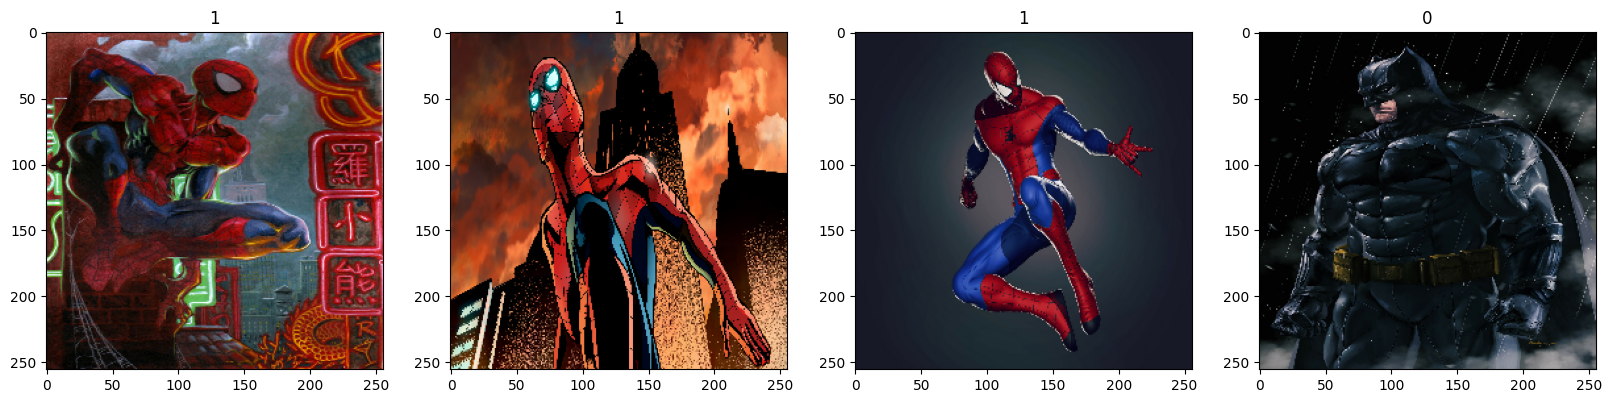

time: 1.29 s (started: 2024-03-01 16:49:23 +00:00)


In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
img = batch[0][3]

time: 544 µs (started: 2024-03-01 16:49:25 +00:00)


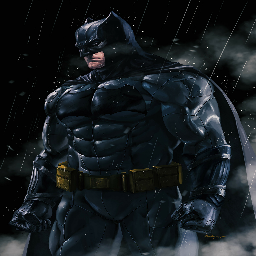

time: 44.6 ms (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
cv2_imshow(cvtColor(img,COLOR_BGR2RGB))


In [ ]:
train_size = int(len(dataset)*.7)
val_size = int(len(dataset)*.3)
test_size = int(len(dataset)*.3)

time: 1.31 ms (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
test_size + val_size + train_size

4

time: 2.65 ms (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size+val_size).take(test_size)

time: 11.5 ms (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
model = Sequential([
    Conv2D(16,(3,3),1,activation = 'relu',input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(32,(3,3),1,activation='relu'),
    MaxPooling2D(),
    Conv2D(16,(3,3),1,activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256,activation='relu'),
    Dense(1,activation='sigmoid')
])

time: 190 ms (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics=['accuracy'])

time: 21 ms (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
!mkdir log

mkdir: cannot create directory ‘log’: File exists
time: 17.6 ms (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='log')

time: 547 µs (started: 2024-03-01 16:49:25 +00:00)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
2/2 [==============================] - 12s 6s/step - loss: 429.4049 - accuracy: 0.5625 - val_loss: 487.5487 - val_accuracy: 0.5312
Epoch 2/20
2/2 [==============================] - 9s 5s/step - loss: 218.7457 - accuracy: 0.4844 - val_loss: 334.1371 - val_accuracy: 0.4375
Epoch 3/20
2/2 [==============================] - 13s 6s/step - loss: 268.5349 - accuracy: 0.5156 - val_loss: 280.2851 - val_accuracy: 0.4688
Epoch 4/20
2/2 [==============================] - 11s 6s/step - loss: 210.6796 - accuracy: 0.4375 - val_loss: 39.5795 - val_accuracy: 0.5938
Epoch 5/20
2/2 [==============================] - 12s 7s/step - loss: 34.5392 - accuracy: 0.5000 - val_loss: 2.2640 - val_accuracy: 0.7500
Epoch 6/20
2/2 [==============================] - 11s 7s/step - loss: 5.4577 - accuracy: 0.6719 - val_loss: 8.7257 - val_accuracy: 0.6250
Epoch 7/20
2/2 [==============================] - 11s 6s/step - loss: 7.7920 - accuracy: 0.5156 - val_loss: 3.6144 - val_accuracy: 0.5312
Epoch 8/20
2/2 [===

In [ ]:
hist.history

{'loss': [429.4049072265625,
  218.74566650390625,
  268.534912109375,
  210.67962646484375,
  34.539207458496094,
  5.457694053649902,
  7.791995048522949,
  1.6898163557052612,
  2.8587353229522705,
  2.256869316101074,
  0.3576695919036865,
  0.28103211522102356,
  0.407215416431427,
  0.3200853765010834,
  0.2881597876548767,
  0.2520880103111267,
  0.2079053670167923,
  0.1929553747177124,
  0.18771252036094666,
  0.1363377869129181],
 'accuracy': [0.5625,
  0.484375,
  0.515625,
  0.4375,
  0.5,
  0.671875,
  0.515625,
  0.75,
  0.625,
  0.578125,
  0.828125,
  0.921875,
  0.796875,
  0.859375,
  0.90625,
  0.9375,
  1.0,
  0.984375,
  0.984375,
  0.984375],
 'val_loss': [487.5487365722656,
  334.13714599609375,
  280.2851257324219,
  39.57948303222656,
  2.2640151977539062,
  8.72572135925293,
  3.61439847946167,
  1.7570724487304688,
  2.981692314147949,
  0.5957744121551514,
  0.18002185225486755,
  0.3255743384361267,
  0.33161044120788574,
  0.27227097749710083,
  0.23544564

time: 25.2 ms (started: 2024-03-01 17:01:43 +00:00)


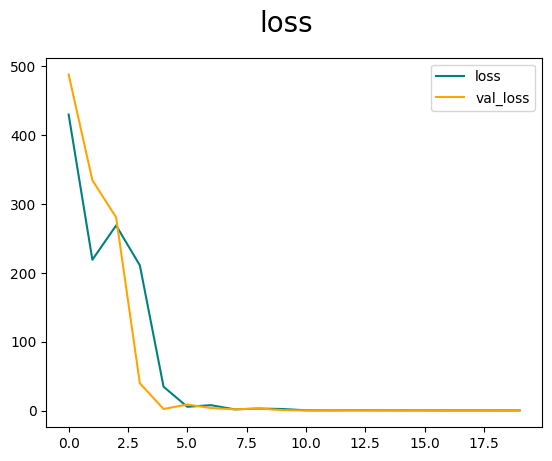

time: 231 ms (started: 2024-03-01 17:10:41 +00:00)


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend()
plt.show()

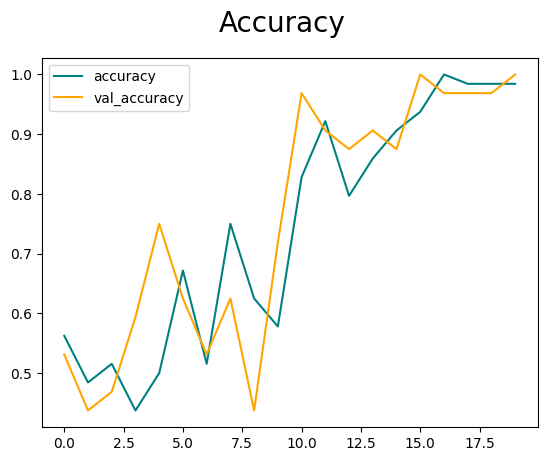

time: 368 ms (started: 2024-03-01 17:09:55 +00:00)


In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color = 'orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

time: 496 µs (started: 2024-03-01 17:12:04 +00:00)


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

time: 21 ms (started: 2024-03-01 17:12:36 +00:00)


In [ ]:
for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)


1/1 [==============================] - 0s 167ms/step
time: 5.1 s (started: 2024-03-01 17:15:04 +00:00)


In [ ]:
print(f'precision : {pre.result().numpy()}, recall : {re.result().numpy()}, accuracy : {acc.result().numpy()}')

precision : 1.0, recall : 1.0, accuracy : 1.0
time: 26.6 ms (started: 2024-03-01 17:20:10 +00:00)


In [ ]:
!mkdir test_images

time: 130 ms (started: 2024-03-01 17:25:42 +00:00)


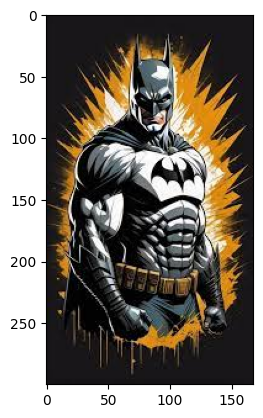

time: 328 ms (started: 2024-03-01 18:27:29 +00:00)


In [ ]:
img = imread('/content/test_images/batmanti4.jfif')
plt.imshow(cvtColor(img,COLOR_BGR2RGB))
plt.show()

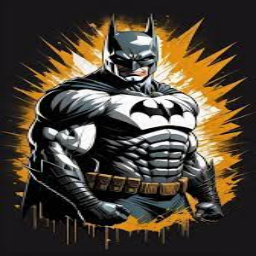

time: 39.5 ms (started: 2024-03-01 18:27:32 +00:00)


In [ ]:
test_img = tf.image.resize(img,(256,256))
cv2_imshow(test_img.numpy())

In [ ]:
yhat = model.predict(np.expand_dims(test_img/255,0))

1/1 [==============================] - 0s 35ms/step
time: 95.8 ms (started: 2024-03-01 18:27:34 +00:00)


In [ ]:
yhat

array([[0.49889508]], dtype=float32)

time: 3.74 ms (started: 2024-03-01 18:27:37 +00:00)


In [ ]:
if yhat > 0.5:
  print(f'predicted image is spiderman ')
else:
  print(f'predicted image is batman ')

predicted image is batman 
time: 630 µs (started: 2024-03-01 18:27:39 +00:00)


save the model


In [ ]:
from keras.models import load_model

In [ ]:
!mkdir models

In [ ]:
!pip install h5py pyyaml

In [ ]:
from __future__ import absolute_import, division, print_function
tf.__version__

In [ ]:
model.save(os.path.join('models','batman_spider_iclass.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


time: 326 ms (started: 2024-03-01 18:01:43 +00:00)


In [ ]:
import pickle

time: 526 µs (started: 2024-03-01 18:04:25 +00:00)


In [ ]:
pickle.dump(model,open('/content/models/image_classifier1','wb'))

time: 222 ms (started: 2024-03-01 18:21:28 +00:00)


In [ ]:
with open('image_class1.pkl','wb') as pickle_file:
  pickle.dump(model,pickle_file)

time: 845 ms (started: 2024-03-01 18:36:30 +00:00)


In [ ]:
loaded_model = pickle.load(open('/content/models/image_classifier1','rb'))

time: 2.16 s (started: 2024-03-01 18:22:18 +00:00)


In [ ]:
loaded_model.predict(np.expand_dims(test_img/255,0))

1/1 [==============================] - 0s 90ms/step


array([[0.50220805]], dtype=float32)

time: 157 ms (started: 2024-03-01 18:22:23 +00:00)


In [ ]:
with open('image_class1.pkl','rb') as pickle_file:
  new_model = pickle.load(pickle_file)

time: 1.82 s (started: 2024-03-01 18:39:27 +00:00)


In [ ]:
new_yhat = new_model.predict(np.expand_dims(test_img/255,0))

1/1 [==============================] - 0s 37ms/step
time: 101 ms (started: 2024-03-01 18:40:11 +00:00)


In [ ]:
if new_yhat > 0.5:
  print(f'predicted image is spiderman ')
else:
  print(f'predicted image is batman ')

predicted image is batman 
time: 11.5 ms (started: 2024-03-01 18:40:19 +00:00)
